In [48]:
from general import General
general = General()

<span style="color:#ff6200; ">Section: 8.1.1</span>

<span style="color:#ff6200;">Exercise 8.1</span>

_<span style="color:#ff6200;">Answer:</span>_

In [49]:
# Basic Answer
# It is not profitable to exercise the option now, 
# when the strike price is < 37, the investor will
# start making profit and the option will be in the money
#
# In-depth Answer
# The value of the investment will grow with the compounding
# interest, the payoff of the put option is max{K - St}, where
# K is the strike price and St is the stock price at maturity.
# Compounding is continuous, so e**(r * deltaT), then the profit
# from put option (in case it is in the money) would be 
# (K - St) - 3 * e**(r * deltaT), where 3 is the investment
# if (K - St) - 3 * e**(r * deltaT) >! 0, then making the
# investment is unreasonable as there will be no profit made from it

<span style="color:#ff6200;">Exercise 8.2</span>

In [50]:
import numpy as np
sig = 0.2
rf = 0.06
deltaT = 1
u = np.e**(sig * deltaT**0.5)
d = u**-1
K = 100


_<span style="color:#ff6200;">Answer:</span>_

In [51]:
general.bindomrender((general.option(general.binomt(3, u, d, K), K, 'c', u, d, rf, 1)))

-----binom-lattice-----
[23.124246089258502]
[35.97280429244071, 7.15740235491472]
[55.00601640570216, 12.5883621755978, 12.5883621755978, 0.0]
[82.2118800390509, 22.14027581601698, 22.14027581601698, 0, 22.14027581601698, 0, 0, 0]


<span style="color:#ff6200;">Exercise 8.3</span>

_<span style="color:#ff6200;">Answer:</span>_

In [52]:
# an American option is a superset of a European option, that is, it has the properties of a European
# option, and has extensions to that, more precisely, that would be the right to exercise an option 
# that has not matured yet.

<span style="color:#ff6200;">Exercise 8.4</span>

In [53]:
u = 1.2
d = 0.8
r = 0.05
per = 2
Δt = 1
K = 52
S = 50

_<span style="color:#ff6200;">Answer:</span>_

In [54]:
stock_tree = general.binomt(per, u, d, S)
option_tree = general.option(stock_tree, K, 'p', u, d, r, Δt)
american_tree = general.america_option(stock_tree, option_tree, 'p', K)
general.bindomrender(american_tree)

general.bindomrender(stock_tree)
general.bindomrender(option_tree)
# as visible, (12.0, 9.463930074037123) would be the case where
# exercising the option early would be optimal for the investor

-----binom-lattice-----
[(2, 4.192654280603857)]
[(0, 1.414753094008567), (12.0, 9.463930074037123)]
[(0, 0), (4.0, 4.0), (4.0, 4.0), (20.0, 20.0)]
-----binom-lattice-----
[50]
[60.0, 40.0]
[72.0, 48.0, 48.0, 32.0]
-----binom-lattice-----
[4.192654280603857]
[1.414753094008567, 9.463930074037123]
[0, 4.0, 4.0, 20.0]


<span style="color:#ff6200;">Exercise 8.5</span>

In [55]:
# use the put call parity
S = 19
rf = 0.04
K = 20
c = 1
Δt = 0.25
d = (1 + rf)**-Δt

p = c + d*K - S

_<span style="color:#ff6200;">Answer:</span>_

In [56]:
p

1.8048547148513094

<span style="color:#ff6200;">Exercise 8.6</span>

Text(0, 0.5, 'profit')

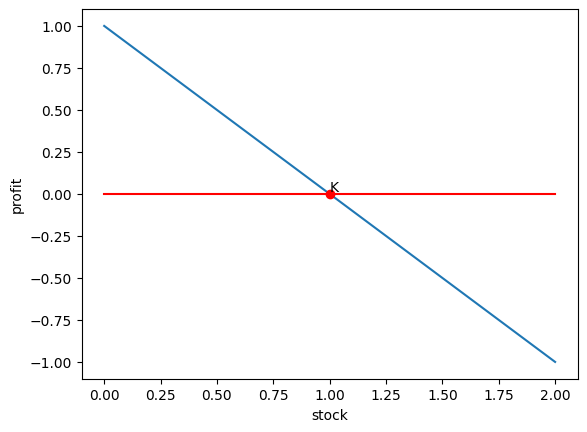

In [57]:
import matplotlib.pyplot as plt
x = [0, 1, 2]
y = [1, 0, -1]
plt.plot(x, y)
x1 = [0, 2]
y1 = [0, 0]
plt.plot(x1, y1, color='red')
plt.plot(1, 0, 'ro')
plt.text(1, 0, 'K', va='bottom')
plt.xlabel('stock')
plt.ylabel('profit')

_<span style="color:#ff6200;">Answer:</span>_

In [58]:
# the investor has a put option now, so he will make profit 
# in case if the stock goes down, letting him sell at a higher
# price. If the stock goes up, then he will not exercise the put
# option since it is not optimal to do so, however he will lose
# the payoff money that could have been obtained via the call option
# that he sold, causing loss in profit

<span style="color:#ff6200;">Exercise 8.7</span>

In [59]:
Kc = 45
Kp = 40
c = 3
p = 4

_<span style="color:#ff6200;">Answer:</span>_

Text(45, -7, '$K_{c}$')

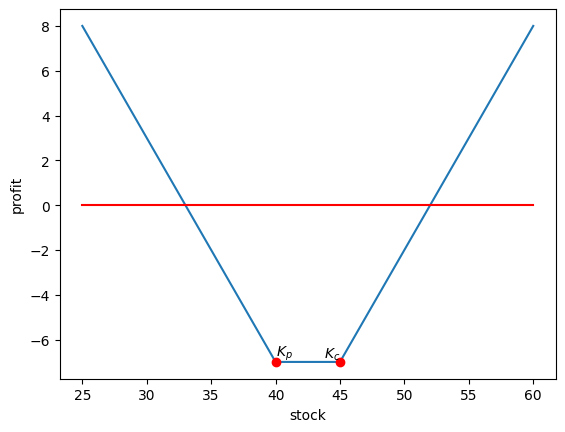

In [60]:
def profit(S):
    return (general.func_put(S, Kp) + general.func_call(S, Kc)) - (c + p)

x = [i for i in range(25, 60+1)]
y = [profit(s) for s in x]
plt.plot(x, y)
x1 = [25, 60]
y1 = [0, 0]
plt.plot(x1, y1, color='red')
plt.xlabel('stock')
plt.ylabel('profit')
plt.plot(Kp, - (c + p), 'ro')
plt.text(Kp, - (c + p), '$K_{p}$', va='bottom')
plt.plot(Kc, - (c + p), 'ro')
plt.text(Kc, - (c + p), '$K_{c}$', va='bottom', ha='right')

<span style="color:#ff6200;">Exercise 8.8</span>

In [61]:
S = 40
Kp = 30
p = 7
Kc = 50
c = 5
def pos(S, K, samount, camount, pamount):
    return samount*S - camount*general.func_call(S, Kc) + pamount*general.func_put(S, Kp)

_<span style="color:#ff6200;">Answer:</span>_

In [62]:
samount, camount, pamount = 100, 100, 100
x = [i for i in range(0, 100+1)]
y = [pos(s, K, samount, camount, pamount) for s in x]
samount1, camount1, pamount1 = 100, 200, 200
x1 = [i for i in range(0, 100+1)]
y1 = [pos(s, K, samount1, camount1, pamount1) for s in x1]

Text(50, 5000, '$K_{c}$')

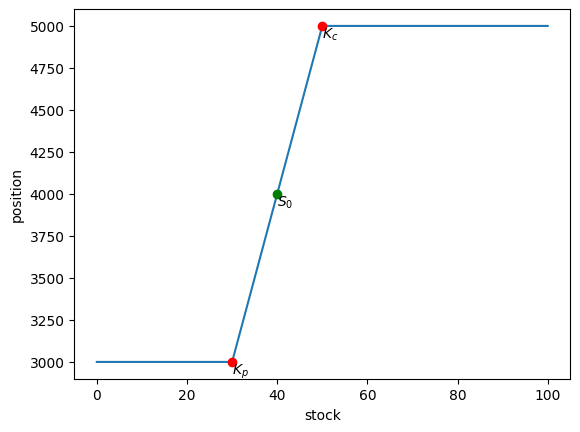

In [63]:
plt.plot(x, y)
plt.xlabel('stock')
plt.ylabel('position')
plt.plot(S, y[S], 'go')
plt.text(S, y[S], '$S_{0}$', ha='left', va='top')
plt.plot(Kp, y[Kp], 'ro')
plt.text(Kp, y[Kp], '$K_{p}$', ha='left', va='top')
plt.plot(Kc, y[Kc], 'ro')
plt.text(Kc, y[Kc], '$K_{c}$', ha='left', va='top')

In [64]:
# desc:
#
# If stock price is between S_{0} and K_{p} in the upcoming year, 
# the call options could not be exercised, as the strike price is higher
# the put option causes some amount of loss as well, since the stock 
# price is higher, therefore a loss is happening in that interval
#
# if the stock price is between S_{0} and K_{c}, then the line rises
# since position is improved with the increasing value of the stocks
# at hand. The call option could not be exercised since the strike
# price is higher, the put option could not be exercised as well since
# the strike price is lower, so those two have no effect
#
# if the stock price is below K_{p}, then the put options start 
# compensating for the devaluation of the stocks at hand, thus,
# the line remains stable
#
# if the stock price is above K_{c}, then the value is forced
# to remain stable, although the value of the stocks at hand 
# increases, there is a loss due to call options that could 
# have been exercised if they were at hand (the strike price
# is lower in this case)
#

Text(50, 5000, '$K_{c}$')

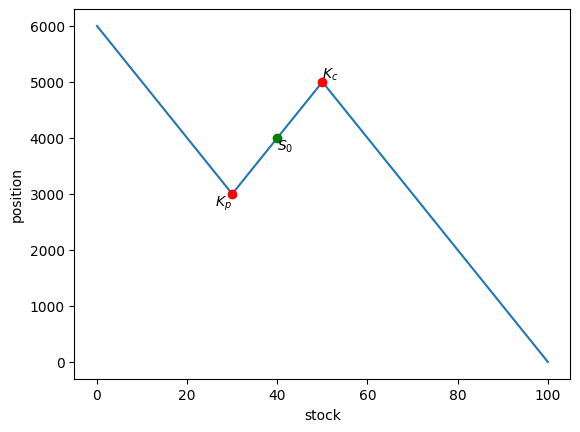

In [65]:
plt.plot(x1, y1)
plt.xlabel('stock')
plt.ylabel('position')
plt.plot(S, y1[S], 'go')
plt.text(S, y1[S], '$S_{0}$', ha='left', va='top')
plt.plot(Kp, y[Kp], 'ro')
plt.text(Kp, y[Kp], '$K_{p}$', ha='right', va='top')
plt.plot(Kc, y[Kc], 'ro')
plt.text(Kc, y[Kc], '$K_{c}$', ha='left', va='bottom')

<span style="color:#ff6200;">Exercise 8.9</span>

In [66]:
Δt= 1/12
K = 120
c = 20
p = 5
S = 130
from sympy import symbols, solve
r = symbols('r')


_<span style="color:#ff6200;">Answer:</span>_

In [67]:
expr1 = c - p + (np.e**(-r*Δt * 12))*K - S
sol1 = solve(expr1, r)

expr2 = c - p + (1/(1+r)**(12 * 1/12))*K - S
sol2 = solve(expr2, r)

# sol2 is an approximation of sol1
sol1, sol2

([0.0425596144187959], [0.0434782608695652])

<span style="color:#ff6200; ">Section: 9.1.1</span>

<span style="color:#ff6200;">Exercise 9.2</span>

_<span style="color:#ff6200;">Answer:</span>_

In [68]:
# we know that dXt = mu*Xtdt + sig*XtWt for this stochastic process
# we also know that a linear stochastic process differential looks as follows:
# Xt = (a(t) * Xt - c(t))dt + (b(t) * Xt - e(t))dWt
# Then we can say that a(t) = mu, b(t) = sig, c(t) = d(t) = 0 in this situation
# phi(t, t0) = exp(int_{t, t0} (a(s) - b(s)**2 / 2)ds + int_{t0, t} b(s)dWs)
# and Xt = phi(t, t0) * (Xt0 + int_{t, t0} phi(s, t0)**-1 (c(s) - b(s)*e(x))ds int_{t, t0} phi(s, t0)**-1 e(s)dWs)
#
# we know that phi(t, t0 = 0) = exp(int_{t, t0} (mu - sig**2 / 2)ds + int_{t0, t} sigdWs)
#                             = e**((mu - sig**2 / 2)*t + sigd*Wt)                    note: int_{t, t0} const ds = const * (t - t0)
# we also know that
#                  Xt = phi(t, t0) * (Xt0 + int_{t, t0} phi(s, t0)**-1 (0 - b(s)*0)ds int_{t, t0} phi(s, t0)**-1 0dWs)
#                  Xt = e**((mu - sig**2 / 2)*t + sigd*Wt) * (Xt0 + 0 + 0)
#                  Xt = Xt0 * e**((mu - sig**2 / 2)*t + sigd*Wt)
# SOLUTION FOUND!

<span style="color:#ff6200;">Exercise 9.3</span>

_<span style="color:#ff6200;">Answer:</span>_

In [69]:
# We know that an ITO process looks as follows
# dXt = mu dt + sig dWt     where Xt is a stochastic process
# ITOs lemman says that the differential of a stochastic process mapped from Xt by a function F(Xt, t) is:  
# dF(Xt, t) = (mu * F(t)' + 0.5 * sig**2 * F(x)'')dt + sig * F(x)' dWt
# now, we are given a stochastic process Xt with differential dXt = mu*Xt dt + sig*Xt dWt
# and we want to find d ln(Xt), notice how the process is mapped from Xt to ln(Xt), so the function F = ln() here
# to solve for the differential, we can use ITOs lemma
# if we make it so that the ITO process has parameters:
# mu = mu * Xt
# sig = sig * Xt
# then the differential of ITO process is identical to the differential of the process in question, and we know
# how to solve the differential of the ITO process ! Therefore the differential of the process in question as well
# lets compute the differential of the ITO process:
# first: F(Xt, t) = ln(Xt), so F(Xt)' = Xt**-1, F(Xt)'' = -Xt**-2
# second: F(Xt, t)' = 0, because the process we map to (ln(Xt)) has no t parameter, so what is inside is just a constant
# then if we apply the formula we get
#   dF(Xt, t) = dln(Xt) = (mu * 0 + 0.5 * sig**2 * -Xt**-2)dt + sig * Xt**-1 dWt
#                       = (0.5 * sig**2 * -Xt**-2)dt + sig * Xt**-1 dWt
# SOLUTION FOUND!

<span style="color:#ff6200;">Exercise 9.4</span>

_<span style="color:#ff6200;">Answer:</span>_

In [70]:
# We know that the function F can get a stochastic process as parameter,
# and this question does precisely that, the function F gets a weiner process Wt,
# and then squares that (so any value in the process gets doubled)
# so our original stochastic before the mapping is applied is Wt
# let's recall that an ITO process diffential is
#       dXt = mu dt + sig dWt     where Xt is a stochastic process
# so in this case, if we make mu = 0, sig = 1, the ITO process becomes identical
# with the process in question, the process in question (Wt) has differential dWt,
# and the ITO process we just built has differential 0 + 1*dWt = dWt. 
#
# now, remember that ITO lemma can map this ITO process and find the differential of that mapping,
# more precisely, that is:
# dF(Xt, t) = (mu * F(t)' + 0.5 * sig**2 * F(x)'')dt + sig * F(x)' dWt
# in this case, the function that maps is x^2 (so taking the square), thus
# F(Xt = Wt, t) = Wt**2, so F(Xt = Wt)' = 2Wt, F(Xt = Wt)'' = 2, F(Xt = Wt, t)' = 0 since the process is not dependent on t
# then we derive the following differential for the mapped ITO process
# dF(Xt = Wt, t) = (0 * F(t)' + 0.5 * 1**2 * 2)dt + 1 * 2Wt dWt
#                = dt + 2Wt dWt
# SOLUTION FOUND!

<span style="color:#ff6200;">Exercise 9.5</span>

_<span style="color:#ff6200;">Answer:</span>_

![title](https://d138zd1ktt9iqe.cloudfront.net/media/seo_landing_files/derivative-of-an-integral-1651731474.png)

In [71]:
# We have it that Xt = e**(-\alpha*t) * (X0 + sig*int_{t, t0} e**\alpha*s dWs)
# so the stochastic process in question is defined by the above formula, then
# dXt = d(e**(-\alpha*t) * (X0 + sig*int_{t, t0} e**\alpha*s dWs))
# to compute the differential of the Xt process, we need to compute the differntial
# of the formula above, to do so, we can use the product rule (i.e. chain rule)
# (f(x)*g(x))' = f(x)'*g(x) + f(x)*g(x)'
# let f(t) = e**(-\alpha*t), g(t) = (X0 + sig*int_{t, t0} e**\alpha*s dWs) 
# we will take the derivative with respect to t here, since that is how the differential
# of the stochastic process is defined as well
# f' = e**(-\alpha*t)' = -\alpha*e**(-\alpha*t)
# g' = sig*e**(\alpha*t)dWt (look at rule iii in the image above)
# then we have
# dXt = -\alpha*e**(-\alpha*t) * (X0 + sig*int_{t, t0} e**\alpha*s dWs) + e**(-\alpha*t) * sig*t*e**(\alpha*t)dWt 
#     = sigt dWt + -\alpha*(e**(-\alpha*t) * (X0 + sig*int_{t, t0} e**\alpha*s dWs))
#     = \alpha * Xt + sigt dWt 
# SOLUTION FOUND!

<span style="color:#ff6200;">Exercise 9.6</span>

_<span style="color:#ff6200;">Answer:</span>_

In [72]:
# We have the process Xt = t**2 * (Wt)**3
# we know that the differential of a ITO process is defined by
# dXt = mu dt + sig dWt     where Xt is a stochastic process
# to make the ITO process idntical to the one above, we need to do
# mu = 0, sig = 1, then dXt = dWt = 0 + dWt
# in this case, the process at hand is Wt, and a function is applied to it afterwards
# the function F applied to the process is taking the cube of it, and then multiply it by t**2
# now, to find the differential of the mapped stochastic process, we compute the followings
# F(Xt = Wt)' = t**2 * 3*Wt**2
# F(Xt = Wt)'' = t**2 * 6*Wt 
# F(t)' = 2*t * (Wt)**3
# then the differential for the mapped stochastic process looks as follows
# (0.5 * t**2 * 6*Wt + 2*t * (Wt)**3)dt + (t**2 * 3*Wt**2)dWt
# we know that Wt**3 = Xt * t**-2, so then, Wt = (Xt * t**-2)**(1/3)
# so now, we can plug the Wts in our equation
# (0.5 * t**2 * 6*(Xt * t**-2)**(1/3) + 2*t * (Xt * t**-2)**(1/3)**3)dt + (t**2 * 3*Wt**2)dWt
# after simplification, this yields the result
